In [1]:
import numpy as np

In [6]:
import pickle

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## Simulation Parameters
seed = 1
length_scale = 10
n_time = 50
n_epochs = 2
q = 3
r = 2
std_eps = 0.5
n_steps = 100
chain_size = 50
proposal_std = 0.5

(1, 10, 50, 2, 3, 2, 0.5, 100, 50, 0.5)

In [ ]:
### Key for simulation corresponding to the specified parameters.  Must be in this specific order.
sim_key = (seed, length_scale, n_time, n_epochs, q, r, std_eps, n_steps, chain_size, proposal_std)
sim_key

In [9]:
### Load simulation cache file.
with open('simulation_results.pkl', 'rb') as f:
    cache = pickle.load(f)
sim = cache[sim_key]
print(sim.keys())

dict_keys(['length_scale', 'n_time', 'n_epochs', 'q', 'r', 'std_eps', 'n_steps', 'chain_size', 'proposal_std', 'loading', 'Y', 'F_true', 'F_sample', 'loading_sample', 'variance_sample', 'theta_sample', 'traces_hist', 'mse_history'])


In [19]:
Y = sim['Y']
F_true = sim['F_true']
F_sample = sim['F_sample']
n_time = sim['n_time']
n_epochs = sim['n_time']
q = sim['q']
r = sim['r']
traces_hist = sim['traces_hist']
mse_history = sim['mse_history']
theta_sample = sim['theta_sample']
loading_sample = sim['loading_sample']
variance_sample = sim['variance_sample']

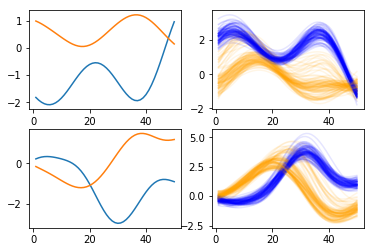

In [11]:
x = np.linspace(1, n_time, n_time)
ax1 = plt.subplot(221)
for j in range(2):
    ax1.plot(x, F_true[:50, j])
    
ax2 = plt.subplot(222)
for i in range(n_steps):
    ax2.plot(x, F_sample[i, :n_time, 0], color='orange', alpha=0.1)
    ax2.plot(x, F_sample[i, :n_time, 1], color='blue', alpha=0.1)
    
ax3 = plt.subplot(223)
for j in range(r):
    ax3.plot(x, F_true[n_time:(2 * n_time), j])

ax4 = plt.subplot(224)
for i in range(n_steps):
    ax4.plot(x, F_sample[i, n_time:(2*n_time), 0], color='orange', alpha=0.1)
    ax4.plot(x, F_sample[i, n_time:(2*n_time), 1], color='blue', alpha=0.1)
plt.show()

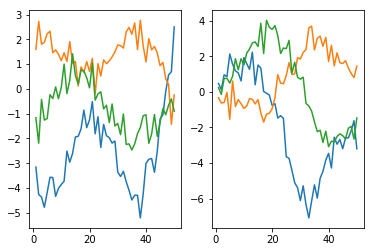

In [12]:
x = np.linspace(1, n_time, n_time)
ax1 = plt.subplot(121)
for j in range(q):
    ax1.plot(x, Y[:n_time, j])
    
ax2 = plt.subplot(122)
for j in range(q):
    plt.plot(x, Y[n_time:(2 * n_time), j])
plt.show()

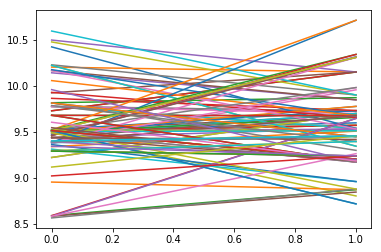

In [13]:
plt.plot(traces[0, :])
plt.plot(traces[1, :])
plt.show()

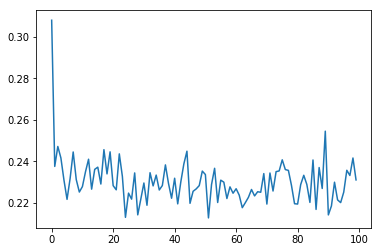

In [14]:
plt.plot(mse_history)
plt.show()

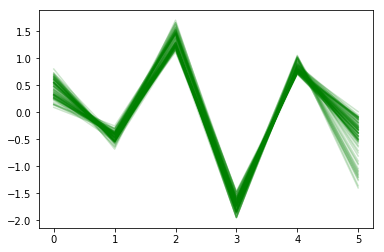

In [15]:
for i in range(n_steps):
    plt.plot(loading_sample[i].flatten(), alpha=0.2, color='green')
plt.show()

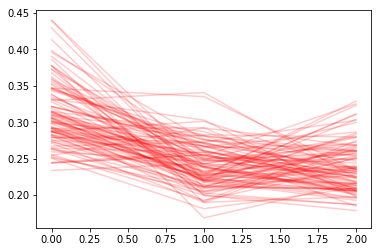

In [16]:
for i in range(n_steps):
    plt.plot(variance_sample[i], alpha=0.2, color='red')
plt.show()

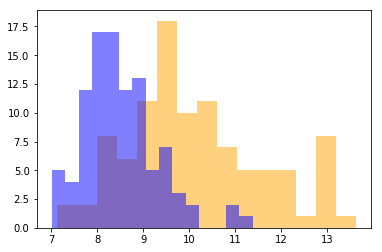

In [17]:
plt.hist(theta_sample[:, 0], bins=15, alpha=0.5, color='orange')
plt.hist(theta_sample[:, 1], bins=15, alpha=0.5, color='blue')
plt.show()

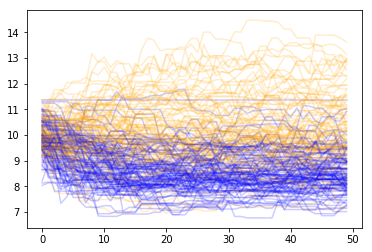

In [20]:
for i in range(100):
    plt.plot(traces_hist[i, 0, :], alpha=0.2, color='orange')
    plt.plot(traces_hist[i, 1, :], alpha=0.2, color='blue')
plt.show()